In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
!pip install seaborn
import seaborn as sns

Numpy Basic Operations

In [2]:
A = np.array([1,2,3,4,5])
B = np.array([6,7,8,9,10])

Sum

In [3]:
A+B

array([ 7,  9, 11, 13, 15])

Multiply

In [4]:
A*B

array([ 6, 14, 24, 36, 50])

Average

In [5]:
print(f"Mean of A = {np.mean(A)}")
print(f"Mean of B = {np.mean(B)}")


Mean of A = 3.0
Mean of B = 8.0


loop vs vectorized execution

In [6]:
prices = np.random.uniform(100, 200, size=10000)

loop

In [7]:
# Daily return
returns_loop = []
def Daily_return(prices):

    for i in range(1, len(prices)):
        ret = (prices[i] - prices[i - 1]) / prices[i - 1]
        returns_loop.append(ret)
    return returns_loop

%timeit Daily_return
#sample returns data
returns = Daily_return(prices)
print([float(r) for r in returns[:5]])


28 ns ± 0.695 ns per loop (mean ± std. dev. of 7 runs, 10,000,000 loops each)
[-0.055482624203848876, 0.2513400870553082, -0.1697860491247069, -0.07026854881856724, 0.09946762615826603]


vector

In [8]:
%timeit returns_vec = (prices[1:] - prices[:-1]) / prices[:-1]

11.2 μs ± 391 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)


Dataset Loading

In [9]:
print(os.getcwd())

C:\Users\My PC\bootcamp_dimil_patel\homework\homework3\notebooks


In [10]:
os.chdir(r"C:\Users\My PC\bootcamp_dimil_patel\homework\homework3")

In [11]:
print(os.getcwd())

C:\Users\My PC\bootcamp_dimil_patel\homework\homework3


In [12]:
df = pd.read_csv('data/starter_data.csv')
df.head(), df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   category  10 non-null     object
 1   value     10 non-null     int64 
 2   date      10 non-null     object
dtypes: int64(1), object(2)
memory usage: 368.0+ bytes


(  category  value        date
 0        A     10  2025-08-01
 1        B     15  2025-08-02
 2        A     12  2025-08-03
 3        B     18  2025-08-04
 4        C     25  2025-08-05,
 None)

Summary Statistics

In [13]:
df.describe()

,value
count,10.000000
mean,17.600000
std,7.381659
min,10.000000
25%,12.250000
50%,14.500000
75%,23.250000
max,30.000000


In [16]:
Data = df.groupby('category')['value'].agg(['min','mean','max', 'std']).reset_index()
Data.columns = ['Category', 'Min','Avg','Max', 'Std']
Data.to_csv('data/processed/summary.csv', index=False)
Data

,Category,Min,Avg,Max,Std
0,A,10,11.500000,13,1.290994
1,B,14,15.666667,18,2.081666
2,C,25,27.666667,30,2.516611


Plotting

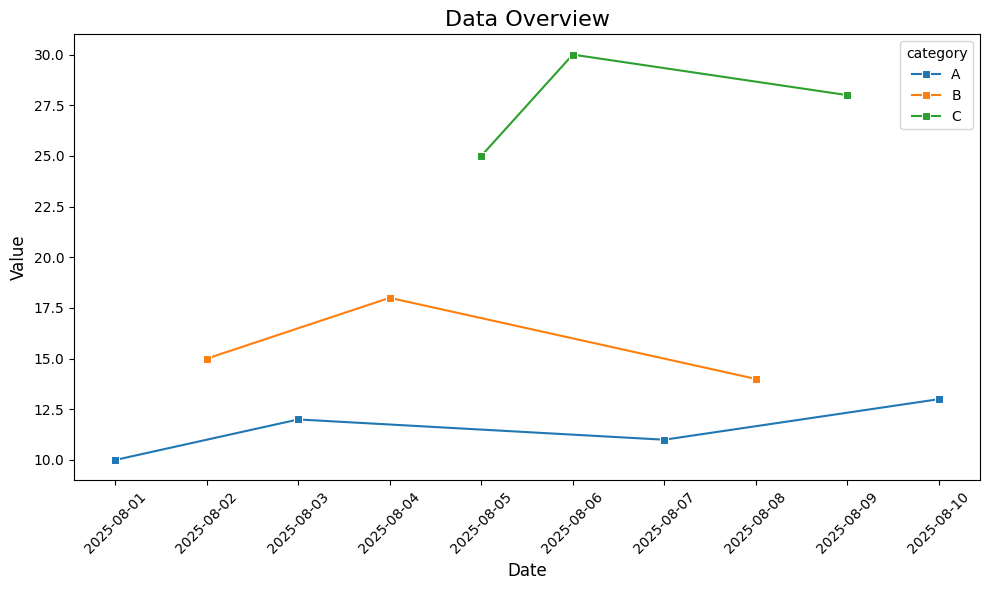

In [26]:
df['date'] = pd.to_datetime(df['date'])

plt.figure(figsize=(10, 6))
sns.lineplot(x='date', y='value', hue='category', data=df, marker='s')
plt.title('Data Overview', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Value', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('data/processed/Data Overview.png');